# Домашнее задание по теме «1.6. Библиотеки Python для визуализации данных»

Выполнил: Алексей Стакун (https://github.com/stakun) 

Используя датасет https://www.kaggle.com/datasets/andrewmvd/data-engineer-jobs:

* Построить график компаний с самым большим кол-вом вакансий
* Построить график самых популярных названий в вакансиях
* Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму
* Построить график популярности по колонке Type of ownership, относительно численности вакансий
* Построить график популярности по секторам работы
* Построить график используя сектора работы и средний уровень зарплат в них
* Построить гистограмму распределения рейтинга компаний
* Построить график средних зарплат по популярным компаниям
* Построить по описанию вакансий облако тегов, исследовать самые популярные слова
* В графиках использовать основные цвета сайта hh.ru

In [80]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Импорт датасета и предобработка данных

In [81]:
df = pd.read_csv('/content/DataEngineer.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


### Преобразование имен столбцов датафрейма в snake_case

In [83]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.lower()
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply'],
      dtype='object')

## Создание палитры для визуализации графиков
**Задача:** использовать в графиках основные цвета сайта hh.ru

Информация о фирменной палитре взята [отсюда](https://dev.hh.ru/articles/logos#:~:text=%D0%A6%D0%B2%D0%B5%D1%82%D0%B0%20%D1%84%D0%B8%D1%80%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%81%D1%82%D0%B8%D0%BB%D1%8F%3A%20%D0%BA%D1%80%D0%B0%D1%81%D0%BD%D1%8B%D0%B9%20%D0%B8%20%D0%B1%D0%B5%D0%BB%D1%8B%D0%B9.&text=%D0%9B%D0%BE%D0%B3%D0%BE%D1%82%D0%B8%D0%BF%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2%20%D0%B4%D0%B2%D1%83%D1%85%20%D1%81%D0%BE%D1%87%D0%B5%D1%82%D0%B0%D0%BD%D0%B8%D1%8F%D1%85,%D1%86%D0%B2%D0%B5%D1%82%D0%BD%D0%B0%D1%8F%20%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F).

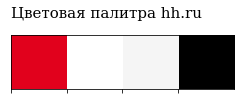

In [84]:
# Задаем палитру

sns.palplot(['#e1011c', '#ffffff', '#f5f5f5','#000000'])
plt.title("Цветовая палитра hh.ru", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

## Рейтинг компаний по количеству вакансий
**Задача:** построить график компаний с самым большим кол-вом вакансий

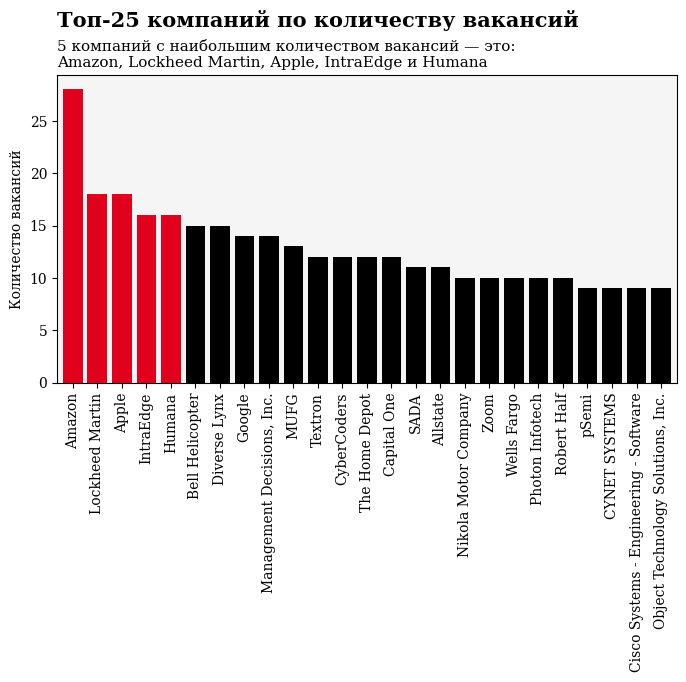

In [85]:
# Функция для очистки имени компании
def chop_name(i_string):
    return i_string.split('\n')[0]

# Строим барплот топ-25 компаний по количеству вакансий
company_rating = df['company_name'].value_counts()

plt.rcdefaults()
#fig, ax = plt.subplots(1, 1, figsize=(4, 8)) # для горизонтального бара
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
colors = ['#e1011c' if i > 15 else '#000000' for i in company_rating[0:25]]
#ax.barh(list(map(chop_name, company_rating.index[0:25])), company_rating[0:25], color = colors) # для горизонтального бара
ax.bar(list(map(chop_name, company_rating.index[0:25])), company_rating[0:25], color = colors)
#ax.invert_yaxis() # для горизонтального бара
ax.margins(x=0.01)
ax.set_facecolor('#f5f5f5')
ax.set_ylabel('Количество вакансий', fontfamily='serif')
#ax.set_title('Топ-25 компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
#sns.barplot(x=company_rating[0:25], y=list(map(chop_name, company_rating.index[0:25])), color='#e1011c')
plt.xticks(rotation = 90, fontfamily='serif')
plt.yticks(fontfamily='serif')
fig.text(0.125, 1, 'Топ-25 компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.9, '''5 компаний с наибольшим количеством вакансий — это:
Amazon, Lockheed Martin, Apple, IntraEdge и Humana'''
, fontsize=11, fontweight='light', fontfamily='serif')
plt.show()

## Рейтинг профессий по количеству вакансий
**Задача:** построить график самых популярных названий в вакансиях

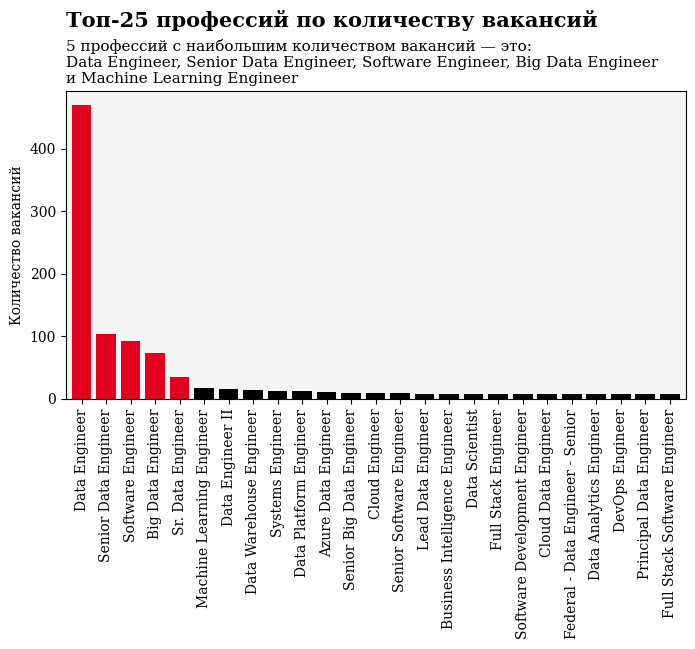

In [86]:
# Строим барплот топ-25 профессий по количеству вакансий
job_rating = df['job_title'].value_counts()

plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
colors = ['#e1011c' if i > 20 else '#000000' for i in job_rating[0:25]]
ax.bar(list(map(chop_name, job_rating.index[0:25])), job_rating[0:25], color = colors)
ax.margins(x=0.01)
ax.set_facecolor('#f5f5f5')
ax.set_ylabel('Количество вакансий', fontfamily='serif')
plt.xticks(rotation = 90, fontfamily='serif')
plt.yticks(fontfamily='serif')
fig.text(0.125, 1.04, 'Топ-25 профессий по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.9, '''5 профессий с наибольшим количеством вакансий — это:
Data Engineer, Senior Data Engineer, Software Engineer, Big Data Engineer
и Machine Learning Engineer'''
, fontsize=11, fontweight='light', fontfamily='serif')
plt.show()

## Рейтинг местоположений компаний по количеству вакансий
**Задача:** Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [87]:
# Заменяем значения -1 в столбце `headquarters` на `Не указано`
df.loc[df['headquarters']=='-1','headquarters'] = 'Не указано'

# Формируем рейтинг
headquarters_rating = df['headquarters'].value_counts()
headquarters_rating.head(10)

New York, NY         178
Не указано           124
Chicago, IL          108
San Diego, CA        103
Houston, TX           64
Austin, TX            62
San Francisco, CA     49
Santa Clara, CA       47
San Antonio, TX       46
Seattle, WA           46
Name: headquarters, dtype: int64

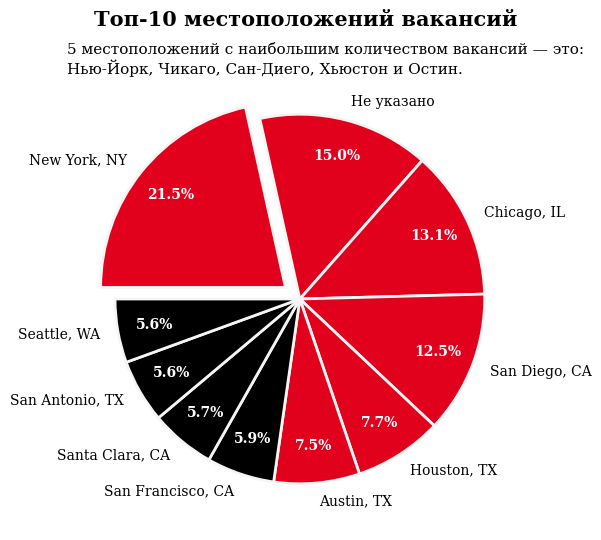

In [88]:
# Строим круговую диаграмму
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
colors = ['#e1011c' if i > 49 else '#000000' for i in headquarters_rating[0:10]]
patches, texts, autotexts  = ax.pie(headquarters_rating[0:10],
                                    labels = headquarters_rating.index[0:10],
                                    colors=colors, startangle=180,
                                    explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),
                                    counterclock=False,
                                    wedgeprops = { 'linewidth' : 2, 'edgecolor' : '#f5f5f5' },
                                    autopct='%1.1f%%', pctdistance=0.8,
                                    textprops={'fontsize': 10, 'fontfamily':'serif'})
# for autotext in autotexts:
#    autotext.set_color('#ffffff')
plt.setp(autotexts, color='#ffffff', fontweight='bold')
fig.text(.170, .95, 'Топ-10 местоположений вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.125, .87, '''5 местоположений с наибольшим количеством вакансий — это:
Нью-Йорк, Чикаго, Сан-Диего, Хьюстон и Остин.'''
, fontsize=11, fontweight='light', fontfamily='serif')
plt.show()

## Рейтинг типов организаций по количеству вакансий
**Задача:** построить график популярности по колонке Type of ownership, относительно численности вакансий

In [89]:
# Заменяем значения -1 и Unknown в столбце `type_of_ownership` на `Не указано`
df['type_of_ownership'] = df['type_of_ownership'].replace('-1', 'Не указано')
df['type_of_ownership'] = df['type_of_ownership'].replace('Unknown', 'Не указано')

# Формируем рейтинг
type_of_ownership_rating = df['type_of_ownership'].value_counts()
type_of_ownership_rating.head(10) 


Company - Private                 1392
Company - Public                   754
Не указано                         149
Subsidiary or Business Segment     126
Nonprofit Organization              48
Government                          21
College / University                13
Contract                            10
Private Practice / Firm              6
Other Organization                   4
Name: type_of_ownership, dtype: int64

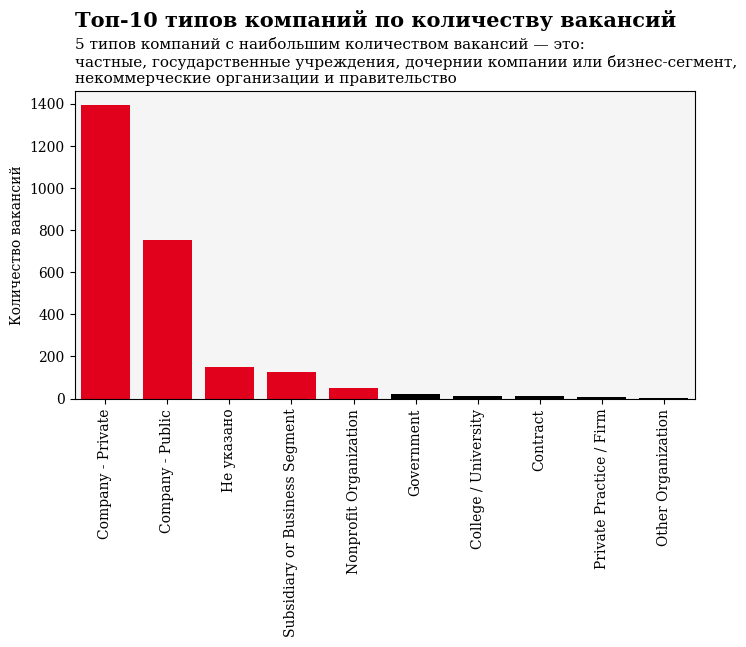

In [90]:
# Строим барплот топ-10 типов компаний по количеству вакансий
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
colors = ['#e1011c' if i > 20 else '#000000' for i in job_rating[0:25]]
ax.bar(list(map(chop_name, type_of_ownership_rating.index[0:10])), type_of_ownership_rating[0:10], color = colors)
ax.margins(x=0.01)
ax.set_facecolor('#f5f5f5')
ax.set_ylabel('Количество вакансий', fontfamily='serif')
plt.xticks(rotation = 90, fontfamily='serif')
plt.yticks(fontfamily='serif')
fig.text(0.125, 1.04, 'Топ-10 типов компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.9, '''5 типов компаний с наибольшим количеством вакансий — это:
частные, государственные учреждения, дочернии компании или бизнес-сегмент,
некоммерческие организации и правительство'''
, fontsize=11, fontweight='light', fontfamily='serif')
plt.show()

## Рейтинг секторов работы по количеству вакансий
**Задача:** построить график популярности по секторам работы

In [91]:
# Заменяем значения -1 и Unknown в столбце `sector` на `Не указано`
df['sector'] = df['sector'].replace('-1', 'Не указано')

# Формируем рейтинг
sector_rating = df['sector'].value_counts()
sector_rating.head(25)

Information Technology                890
Business Services                     416
Не указано                            375
Finance                               177
Aerospace & Defense                    94
Manufacturing                          93
Insurance                              82
Media                                  52
Health Care                            51
Oil, Gas, Energy & Utilities           37
Retail                                 36
Biotech & Pharmaceuticals              35
Telecommunications                     32
Education                              28
Accounting & Legal                     27
Government                             24
Transportation & Logistics             24
Real Estate                            16
Consumer Services                      13
Restaurants, Bars & Food Services       7
Construction, Repair & Maintenance      7
Arts, Entertainment & Recreation        5
Travel & Tourism                        4
Non-Profit                        

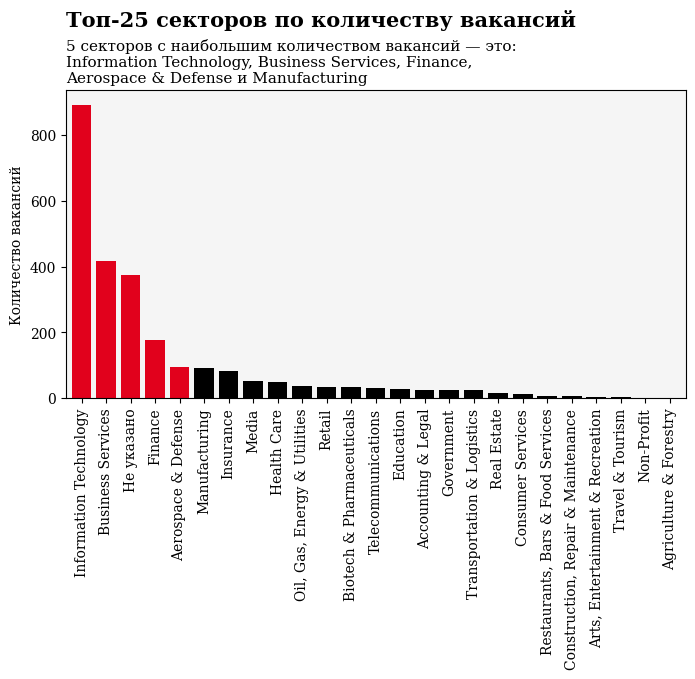

In [92]:
# Строим барплот топ-25 типов компаний по количеству вакансий
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
colors = ['#e1011c' if i > 20 else '#000000' for i in job_rating[0:25]]
ax.bar(list(map(chop_name, sector_rating.index[0:25])), sector_rating[0:25], color = colors)
ax.margins(x=0.01)
ax.set_facecolor('#f5f5f5')
ax.set_ylabel('Количество вакансий', fontfamily='serif')
plt.xticks(rotation = 90, fontfamily='serif')
plt.yticks(fontfamily='serif')
fig.text(0.125, 1.04, 'Топ-25 секторов по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.9, '''5 секторов с наибольшим количеством вакансий — это:
Information Technology, Business Services, Finance, 
Aerospace & Defense и Manufacturing'''
, fontsize=11, fontweight='light', fontfamily='serif')
plt.show()

## Рейтинг секторов работы по уровню средних зарплат
**Задача:** построить график используя сектора работы и средний уровень зарплат в них

В исходном датасете зарплаты указаны в виде строк с диапазонами значений от минимальной до максимальной. Для того, чтобы найти средний уровень зарплат, необходим отпарсить из этих строк минимальные и максимальные значения зарплат и превести их из строкового формата в числовой.

In [93]:
# Порядок парсинга строки с диапазонами зарплат

s = '$80K-$150K (Glassdoor est.)' # Взяли для примера строку из поля salary_estimate

# 1. Разбиваем строку на части по символу 'К'
s_pars = s.split('K')

# 2. Берем первую часть (минимальная зп)
s_pars[0]

# 3. Снова разбиваем полученную строку на две части — знак $ и значение зп
s_pars[0].split('$')

# 4. Берем из получившегося списка вторую часть — значение зп
s_pars[0].split('$')[1]

# 5. Преобразуем получившуюся строку в число методом pd_to_numeric
min_salary = pd.to_numeric(s_pars[0].split('$')[1]) # Получаем значение минимальной зп
max_salary = pd.to_numeric(s_pars[1].split('$')[1]) # Получаем значение минимальной зп

# 6. Проверяем результат
print(min_salary,', ', max_salary)

80 ,  150


In [94]:
# Создадим две функции, которые будут парсить строку с зарплатами
# 1. Функция, которая возвращает числовое значение минимальной зарплаты
def parse_min_salary(salary):
  return pd.to_numeric(salary.split('K')[0].split('$')[1])

# 2. Функция, которая возвращает числовое значение максимальной зарплаты
def parse_max_salary(salary):
  return pd.to_numeric(salary.split('K')[1].split('$')[1])  


In [95]:
# Создаем в датафрейме три новых столбца с числовыми значениями
# минимальной, максимальной и вычисленной по ним средней зарплате

df['min_salary'] = list(map(parse_min_salary, df['salary_estimate']))
df['max_salary'] = list(map(parse_max_salary, df['salary_estimate']))
df['avg_salary'] = (df['min_salary'] + df['max_salary'])/2

df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,min_salary,max_salary,avg_salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,80,150,115.0
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,80,150,115.0
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,80,150,115.0
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,80,150,115.0
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,80,150,115.0


In [118]:
# Группируем сектора по среднему уровню зарплат с помощью сводной таблицы
df_pivot = df.pivot_table(index='sector', values='avg_salary')

# Формируем рейтинг, сортируя сводную таблицу по убыванию и сохраняем ее в новый датафрейм
sector_avg_salary_rating = df_pivot.sort_values(by='avg_salary', ascending=False).reset_index()

sector_avg_salary_rating

,sector,avg_salary
0,Biotech & Pharmaceuticals,112.314286
1,Media,111.076923
2,Accounting & Legal,106.259259
3,Health Care,106.235294
4,Non-Profit,105.750000
5,Information Technology,104.754494
6,Manufacturing,103.672043
7,Education,102.375000
8,Transportation & Logistics,100.750000
9,"Restaurants, Bars & Food Services",100.571429


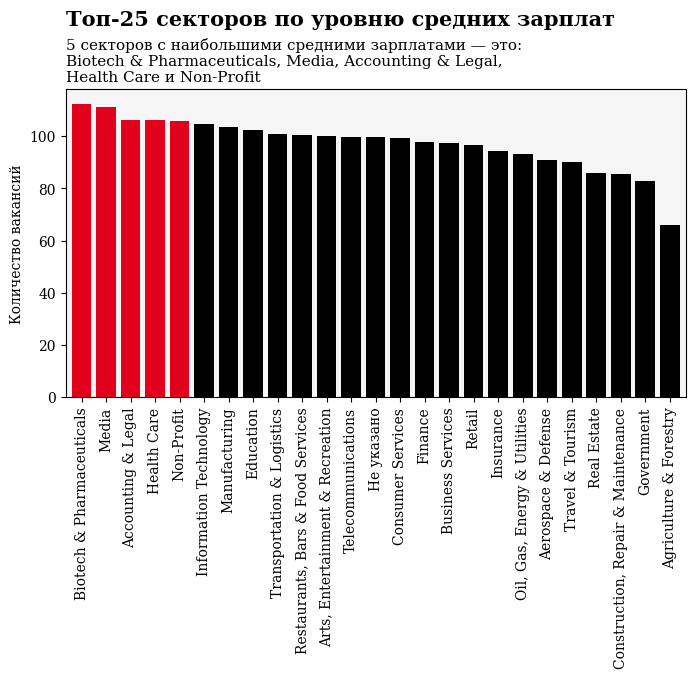

In [124]:
# Строим барплот топ-25 типов компаний по количеству вакансий
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
colors = ['#e1011c' if i < 5 else '#000000' for i in sector_avg_salary_rating.index]
#ax.bar(list(map(chop_name, sector_avg_salary_rating.index[0:25])), sector_avg_salary_rating[0:25], color = colors)
ax.bar(sector_avg_salary_rating['sector'], sector_avg_salary_rating['avg_salary'], color=colors)
ax.margins(x=0.01)
ax.set_facecolor('#f5f5f5')
ax.set_ylabel('Количество вакансий', fontfamily='serif')
plt.xticks(rotation = 90, fontfamily='serif')
plt.yticks(fontfamily='serif')
fig.text(0.125, 1.04, 'Топ-25 секторов по уровню средних зарплат', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.9, '''5 секторов с наибольшими средними зарплатами — это:
Biotech & Pharmaceuticals, Media, Accounting & Legal, 
Health Care и Non-Profit'''
, fontsize=11, fontweight='light', fontfamily='serif')
plt.show()

## Распределение рейтингов компаний
**Задача:** построить гистограмму распределения рейтинга компаний

In [141]:
# Заменим значения рейтинга -1 на медианные значения рейтинга
# 1. Находим медианное значение рейтинга без строк с -1
median_rating = df.loc[df['rating'] != -1]['rating'].median()

# 2. Заменяем значения -1 в столбце rating методом replace
df['rating'] = df['rating'].replace(-1, median_rating)

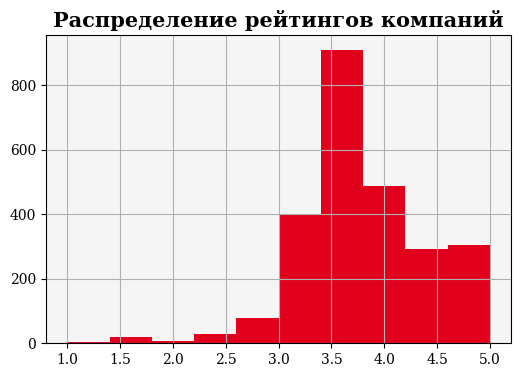

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

df.rating.hist(bins=10, color = '#e1011c')
plt.title('Распределение рейтингов компаний', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_facecolor('#f5f5f5')
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.show()

## Средний уровень зарплат по популярным компаниям

**Задача:** построить график средних зарплат по популярным компаниям

Под популярными будем считать компании с рейтингом >= 4.5

In [147]:
# Формируем выборку со значением рейтинга > 4.5
df_popular_comp = df.loc[df['rating'] >= 4.5]

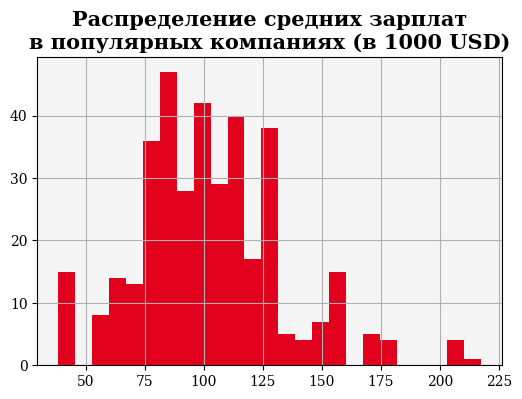

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

#df.avg_salary.hist(bins=25, color = '#e1011c')
df_popular_comp.avg_salary.hist(bins=25, color = '#e1011c')
plt.title('''Распределение средних зарплат
в популярных компаниях (в 1000 USD)''', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_facecolor('#f5f5f5')
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.show()

## Облако тэгов по описанию вакансий
**Задача:** построить по описанию вакансий облако тегов, исследовать самые популярные слова

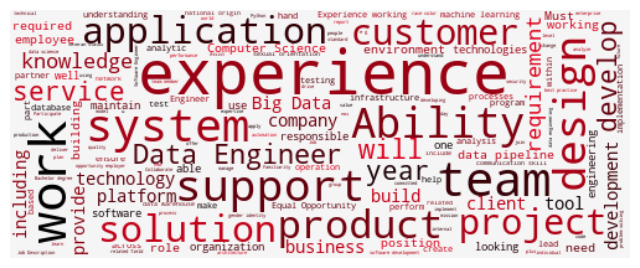

In [97]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib

stopwords = set(STOPWORDS)
text = " ".join(txt for txt in df['job_description'])

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#e1011c', '#000000'])

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=150,
                      width = 500, height = 200, colormap=cmap,
                      background_color='#f5f5f5').generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Вывод:** десять наиболее часто встречающихся в описаниях вакансий слов:

1. experience
1. ability
1. work
1. system 
1. team
1. design
1. support
1. customer
1. product
1. application

